In [1]:
# 0. 사용할 패키지 불러오기
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 준비하기
# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [3]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [4]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [5]:
# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
# keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
early_stopping = EarlyStopping(patience=20) # 조기종료 콜백함수 정의
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 216us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 131us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 133us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 130us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 132us/step - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 131us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 125us/step - loss: 2.0721 - acc: 0.2071 - val_loss: 2.0727 - val_acc: 0.2067
Ep

700/700 [==============================] - 0s 138us/step - loss: 1.7552 - acc: 0.2614 - val_loss: 1.8256 - val_acc: 0.2500
Epoch 61/3000
700/700 [==============================] - 0s 129us/step - loss: 1.7566 - acc: 0.2814 - val_loss: 1.8336 - val_acc: 0.2400
Epoch 62/3000
700/700 [==============================] - 0s 132us/step - loss: 1.7531 - acc: 0.2729 - val_loss: 1.8312 - val_acc: 0.2267
Epoch 63/3000
700/700 [==============================] - 0s 136us/step - loss: 1.7505 - acc: 0.2857 - val_loss: 1.8299 - val_acc: 0.2000
Epoch 64/3000
700/700 [==============================] - 0s 136us/step - loss: 1.7484 - acc: 0.2800 - val_loss: 1.8268 - val_acc: 0.2200
Epoch 65/3000
700/700 [==============================] - 0s 132us/step - loss: 1.7457 - acc: 0.2814 - val_loss: 1.8298 - val_acc: 0.2033
Epoch 66/3000
700/700 [==============================] - 0s 128us/step - loss: 1.7439 - acc: 0.2786 - val_loss: 1.8296 - val_acc: 0.2067
Epoch 67/3000
700/700 [==============================] 

Epoch 120/3000
700/700 [==============================] - 0s 132us/step - loss: 1.6661 - acc: 0.3129 - val_loss: 1.8219 - val_acc: 0.2200
Epoch 121/3000
700/700 [==============================] - 0s 126us/step - loss: 1.6646 - acc: 0.3071 - val_loss: 1.8132 - val_acc: 0.2233
Epoch 122/3000
700/700 [==============================] - 0s 134us/step - loss: 1.6637 - acc: 0.3229 - val_loss: 1.8194 - val_acc: 0.2200
Epoch 123/3000
700/700 [==============================] - 0s 132us/step - loss: 1.6629 - acc: 0.3100 - val_loss: 1.8139 - val_acc: 0.2200
Epoch 124/3000
700/700 [==============================] - 0s 125us/step - loss: 1.6619 - acc: 0.3143 - val_loss: 1.8187 - val_acc: 0.2267
Epoch 125/3000
700/700 [==============================] - 0s 127us/step - loss: 1.6606 - acc: 0.3257 - val_loss: 1.8212 - val_acc: 0.2333


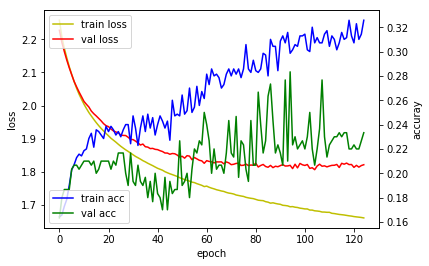

In [6]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [7]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 19us/step

loss : 1.84164377899
accuray : 0.2717
